# AE240 SpaceFlight Mechanics
## Course Project - Space Shuttle STS-51G/PAM-D, Arabsat-1B Satellite
---
### Soham S. Phanse, 19D170030
### Under Guidance of : Prof. Ashok Joshi
---
### Department of Aerospace Engineering
### Indian Institute of Technology Bombay

#### Stage 1 Analysis - Parallel Staging

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m_0 = 2094060
tb1 = 127
beta_eq = 9289.5
g_0 = 9.81
Isp = 260.437
v_0 = 0
h_0 = 0

In [3]:
def dmdt(t):
     return beta_eq

def m(t):
    return m_0 - dmdt(t)*t

def h(t):
    l = 1 - (beta_eq*t)/m_0
    return (m_0*g_0*Isp/beta_eq)*(l*np.log(l) + 1 - l) - (0.5*g_0*t*t) + v_0*t + h_0

def g(t):
    R = 6378*1000
    g_0 = 9.81
    n = R*R*g_0
    d = (R + h(t))**2
    return n/d

def v(t):
    return g_0*Isp*np.log(m_0/m(t)) - g(t)*t

def a(t):
    return (-dmdt(t)/m(t))*(g_0*Isp) - g(t)

In [4]:
time = np.array(range(0, 128))
mass = np.zeros(np.size(time))
massder = np.zeros(np.size(time))
velocity = np.zeros(np.size(time))
acceleration = np.zeros(np.size(time))
altitude = np.zeros(np.size(time))

In [5]:
for each in time:
    index = np.where(time==each)
    mass[index] = m(each)
    massder[index] = dmdt(each)
    velocity[index] = v(each)
    acceleration[index] = a(each)
    altitude[index] = h(each)

No handles with labels found to put in legend.


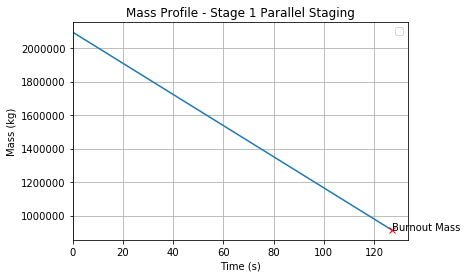

In [6]:
plt.plot(time, mass)
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')
plt.title('Mass Profile - Stage 1 Parallel Staging')
plt.plot(time[-1], mass[-1], 'rx')
plt.annotate('Burnout Mass', [time[-1], mass[-1]])
plt.xlim(0)
plt.grid(1)
plt.legend()

885.706100847671


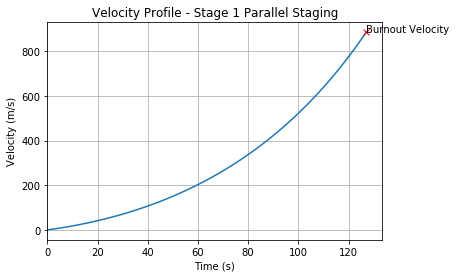

In [7]:
plt.plot(time, velocity)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity Profile - Stage 1 Parallel Staging')
plt.plot(time[-1], velocity[-1], 'rx')
plt.annotate('Burnout Velocity', [time[-1], velocity[-1]])
plt.xlim(0)
plt.grid(1)
print(velocity[-1])

36972.767910888695


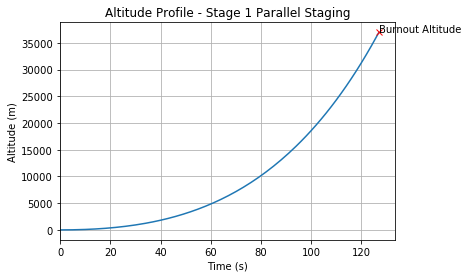

In [8]:
plt.plot(time, altitude)
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude Profile - Stage 1 Parallel Staging')
plt.plot(time[-1], altitude[-1], 'rx')
plt.annotate('Burnout Altitude', [time[-1], altitude[-1]])
plt.xlim(0)
plt.grid(1)
print(altitude[-1])

-35.6556743435502


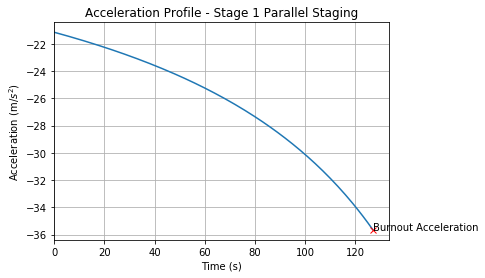

In [9]:
plt.plot(time, acceleration)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/$s^2$)')
plt.title('Acceleration Profile - Stage 1 Parallel Staging')
plt.plot(time[-1], acceleration[-1], 'rx')
plt.annotate('Burnout Acceleration', [time[-1], acceleration[-1]])
plt.xlim(0)
plt.grid(1)
print(acceleration[-1])

## Alternate Approach for Ascent Analysis

In [10]:
time = np.arange(0, 530, 20)
print(time)
altitude = np.array([-8, 1244, 5377, 11617, 19872, 31412, 44726, 57396, 67893, 77485, 85662, 92481, 98004, 102301, 105321, 107449, 108619, 108942, 108543, 107690, 106539, 105142, 103775, 102807, 102552, 103297, 105069])
velocity = np.array([0.1, 139, 298, 433, 685, 1026, 1279, 1373, 1490, 1634, 1800, 1986, 2191, 2417, 2651, 2915, 3203, 3516, 2860, 4216, 4630, 5092, 5612, 6184, 6760, 7327, 7581])
acceleration = np.array([2.45, 18.62, 16.37, 19.40, 24.50, 24.01, 8.72, 9.70, 10.19, 10.68, 11.17, 11.86, 12.45, 13.23, 13.92, 14.90, 15.97, 17.15, 18.62, 20.29, 22.34, 24.89, 28.03, 29.01, 29.30, 29.01, 0.10])

[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]


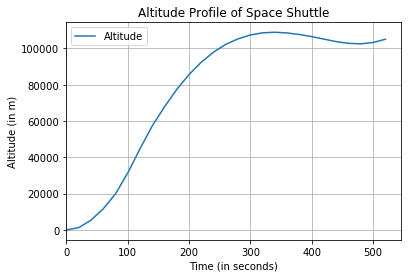

In [11]:
plt.plot(time, altitude, label="Altitude")
plt.xlabel("Time (in seconds)")
plt.ylabel("Altitude (in m)")
plt.title("Altitude Profile of Space Shuttle")
plt.xlim(0)
plt.grid(1)
plt.legend()

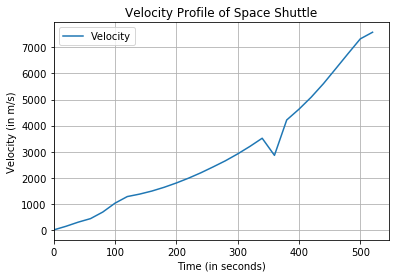

In [12]:
plt.plot(time, velocity, label="Velocity")
plt.xlabel("Time (in seconds)")
plt.ylabel("Velocity (in m/s)")
plt.title("Velocity Profile of Space Shuttle")
plt.xlim(0)
plt.grid(1)
plt.legend()

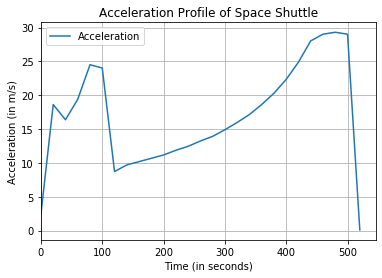

In [13]:
plt.plot(time, acceleration, label="Acceleration")
plt.xlabel("Time (in seconds)")
plt.ylabel("Acceleration (in m/s)")
plt.title("Acceleration Profile of Space Shuttle")
plt.xlim(0)
plt.grid(1)
plt.legend()

In [14]:
costheta = [1]
for i in range(1, 26):
    costheta.append((altitude[i+1]-altitude[i])/(velocity[i]*20))

In [15]:
print(costheta)

[1, 1.4866906474820143, 1.0469798657718121, 0.9532332563510393, 0.8423357664233576, 0.6488304093567251, 0.4953088350273651, 0.3822651128914785, 0.3218791946308725, 0.2502141982864137, 0.18941666666666668, 0.13904833836858005, 0.09806024646280237, 0.06247414149772445, 0.04013579781214636, 0.02006861063464837, 0.005042147986262879, -0.005674061433447099, -0.014912587412587412, -0.013650379506641367, -0.015086393088552915, -0.013423016496465044, -0.008624376336421952, -0.002061772315653299, 0.005510355029585799, 0.012092261498566945]


In [16]:
rangex = np.array([0, 0, 0, 0, 0, 1251.445118, 7211.898888, 22023.20746, 42746.42254, 68191.84937, 97485.99823, 131232.141, 169527.0401, 212499.8049, 260374.9766, 313188.0385, 371394.1241, 435428.324, 505746.5362, 562944.6947, 647245.9431, 739828.6887, 841645.51, 953865.2869, 1077536.088, 1212735.513, 1359271.063])

(-8, 1427234.6161500001)

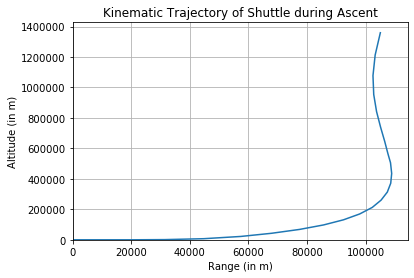

In [17]:
plt.plot(altitude, rangex)
plt.xlabel('Range (in m)')
plt.ylabel('Altitude (in m)')
plt.title('Kinematic Trajectory of Shuttle during Ascent')
plt.xlim(0)
plt.grid(1)
plt.ylim(-8)

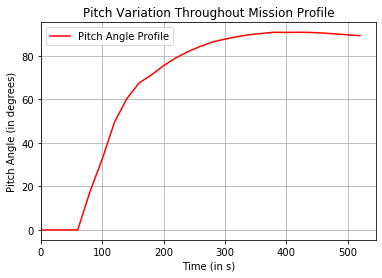

In [18]:
pitch = np.array([0,0,0,0,17.59192814,32.61240102,49.54652231,60.30988267,67.52594028,71.22339126,75.50981231,79.0812565,82.00721856,84.37251824,86.41816279,87.69977033,88.85007611,89.71110498,90.32510152,90.85445999,90.78213343,90.86441944,90.76910529,90.49414649,90.11813094,89.68427832,89.30714757])
plt.plot(time, pitch, 'r', label="Pitch Angle Profile")
plt.xlim(0)
plt.title('Pitch Variation Throughout Mission Profile')
plt.legend()
plt.xlabel('Time (in s)')
plt.ylabel('Pitch Angle (in degrees)')
plt.grid(1)
plt.show()

## Miscellaneous Codes

### Simple Iterations to find h($\theta$) and $\tilde{g(\theta)}$ values

In [19]:
for i in range(5):
    if i == 0:
        h = 9.81*9.3 + 37
        print('h'+str(i)+' =', h)
        g = ((6378/(6378+h))**2)*9.81
        print('g'+str(i)+' =', g)
    else:
        h = g*9.3 + 37
        print('h'+str(i)+' =', h)
        g = ((6378/(6378+h))**2)*9.81
        print('g'+str(i)+' =', g)

#for i in range(5):
#    if i == 0:
#        h = 9.481*14.964 + 124.768
#        print(h)
#        g = ((6378/(6378+h))**2)*9.81
#        print(g)
#    else:
#        h = g*14.964 + 124.768
#        print(h)
#        g = ((6378/(6378+h))**2)*9.81
#        print(g)

#for i in range(10):
#    if i == 0:
#        h = 9.81*3.81 + 260.3
#        print(h)
#        g = ((6378/(6378+h))**2)*9.81
#        print(g)
#    else:
#        h = g*3.81 + 260.3
#        print(h)
#        g = ((6378/(6378+h))**2)*9.81
#        print(g)

#for i in range(5):
#    if i == 0:
#        h = 9.81*21.0846 + 260.3
#        print(h)
#        g = ((6378/(6378+h))**2)*9.81
#        print(g)
#    else:
#        h = g*21.0846 + 260.3
#        print(h)
#        g = ((6378/(6378+h))**2)*9.81
#        print(g)

h0 = 128.233
g0 = 9.427115173454702
h1 = 124.67217111312874
g1 = 9.437442477083044
h2 = 124.76821503687232
g2 = 9.43716370278818
h3 = 124.76562243593008
g3 = 9.437171227833923
h4 = 124.7656924188555
g4 = 9.43717102470778


### Thrust and Burn Profile Estimation of Solid Rocket Boosters

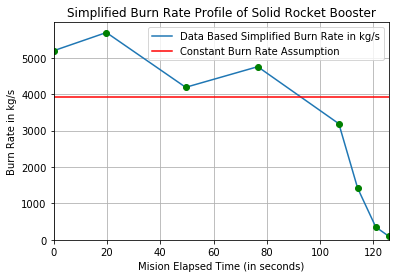

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([6.394884621840902e-14, 19.772727272727337,49.54545454545459,76.59090909090912,107.04545454545456,114.0909090909091,120.90909090909088,125.68181818181816])
y = np.array([2773257.57575758,3039848.484848491,2236439.393939401,2538787.878787889,1702272.727272739,757954.5454545561,186893.9393939497,55151.51515152585])

y_n = y * 4.44822

Isp = 242
g0 = 9.81

beta = y_n/(Isp*g0)

#area = np.trapz(beta, dx = 10000)
#print(area)

#plt.plot(x, y, label="Individual SRB Data in LBF",)
#plt.plot(x, y_n, label="Individual SRB Data in N")
plt.plot(x, beta, label='Data Based Simplified Burn Rate in kg/s')
#plt.plot(x, y, 'ro')
#plt.plot(x, y_n, 'bx')
plt.plot(x, beta, 'go')
plt.plot(x, 3937.0078*np.ones(np.size(x)), 'r', label="Constant Burn Rate Assumption")
plt.title("Simplified Burn Rate Profile of Solid Rocket Booster")
plt.xlabel("Mision Elapsed Time (in seconds)")
plt.ylabel("Burn Rate in kg/s")
plt.grid(True)
plt.xlim((0, x[-1]))
plt.ylim(0)
plt.legend(loc="best")
plt.show()

### Hohmann Transfer Orbits

In [21]:
import numpy as np
import matplotlib.pyplot as plt

r_02 = 42127.3 # Final orbit radius in kilometres
r_01 = 6723.9  # Initial orbit radius in kilometres
r_e = 6378 # Radius of earth in kilometres

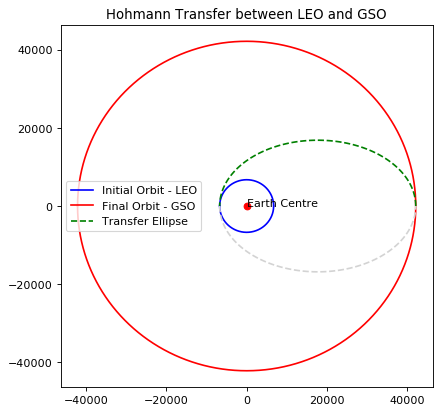

In [22]:
rf = np.arange(-r_02, r_02, 1)
ri = np.arange(-r_01, r_01, 1)
re = np.arange(-r_e, r_e, 1)

# Initial Orbit Parameters
r_piy = np.sqrt(r_01**2 - ri**2)
r_miy = -1*np.sqrt(r_01**2 - ri**2)

# Final Orbit Parameters
r_pfy = np.sqrt(r_02**2 - rf**2)
r_mfy = -1*np.sqrt(r_02**2 - rf**2)

# Earth Surface
r_pey = np.sqrt(r_e**2 - re**2)
r_mey = -1*np.sqrt(r_e**2 - re**2)

# Transfer Ellipse of Hohmann Transfer
t = np.linspace(0, np.pi, 100)
t2 = np.linspace(np.pi, 2*np.pi, 100)

eccentricity = (r_02 - r_01)/(r_02 + r_01)
e = eccentricity
a = (r_01 + r_02)/2
b = abs(a*np.sqrt(1 - eccentricity**2))

u = a*e     #x-position of the center
v = 0    #y-position of the center

## Plotting
plt.figure(figsize=(6, 6), dpi=80)

plt.plot(ri, r_piy, 'b', label='Initial Orbit - LEO')
plt.plot(ri, r_miy, 'b')

plt.plot(rf, r_pfy, 'r', label="Final Orbit - GSO")
plt.plot(rf, r_mfy, 'r')

#plt.plot(re, r_pey, 'g', label="Earth Surface")
#plt.plot(re, r_mey, 'g')

plt.plot( u+a*np.cos(t) , v+b*np.sin(t), 'g--', label = 'Transfer Ellipse')
plt.plot( u+a*np.cos(t2) , v+b*np.sin(t2), color = 'lightgray', linestyle='--')
plt.plot(0, 0, 'ro')
plt.annotate('Earth Centre', xy = (0, 0))
#plt.grid(color='lightgray',linestyle='--')

plt.title('Hohmann Transfer between LEO and GSO')
plt.legend()
plt.show()

### Pitch Angle Estimation for Shuttle Ascent Mission 
---
#### Section (in Report) : Stage 2 Analysis

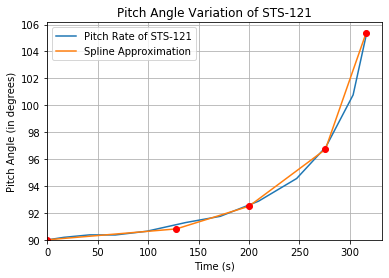

In [23]:
import numpy as np
import matplotlib.pyplot as plt

time = np.array([0.5185185185185048,
16.59259259259258,
42,
67.4074074074074,
98.51851851851852,
137.40740740740745,
171.62962962962962,
209.48148148148152,
247.33333333333337,
276.3703703703704,
303.33333333333337,
316.29629629629636])

pitch = np.array([89.99972047519218,
90.18406708595388,
90.36589797344514,
90.35904961565339,
90.63368273934312,
91.28357791754019,
91.74605171208945,
92.86792452830188,
94.55583508036338,
96.90649895178197,
100.76715583508036,
105.19762403913347])

plt.plot(time, pitch, label="Pitch Rate of STS-121")
plt.plot([0,128, 200, 275.85, 316.30], [90, 90.81, 92.493, 96.718, 105.39],label="Spline Approximation")
plt.plot([0,128, 200, 275.85, 316.30], [90, 90.81, 92.493, 96.718, 105.39],'ro')
plt.xlabel("Time (s)")
plt.ylabel("Pitch Angle (in degrees)")
plt.xlim(0)
plt.ylim(90)
plt.legend(loc="best")
plt.title("Pitch Angle Variation of STS-121")
plt.grid(1)
plt.show()
